# Student Stress

### Import

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


### Download the database

In [16]:
url = "https://raw.githubusercontent.com/MiliCod/Insights-Unveiled-A-Data-Driven-Exploration-of-Student-Stress-Factors/main/StressLevelDataset.csv"
data = pd.read_csv(url)

### Correlation matrice


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

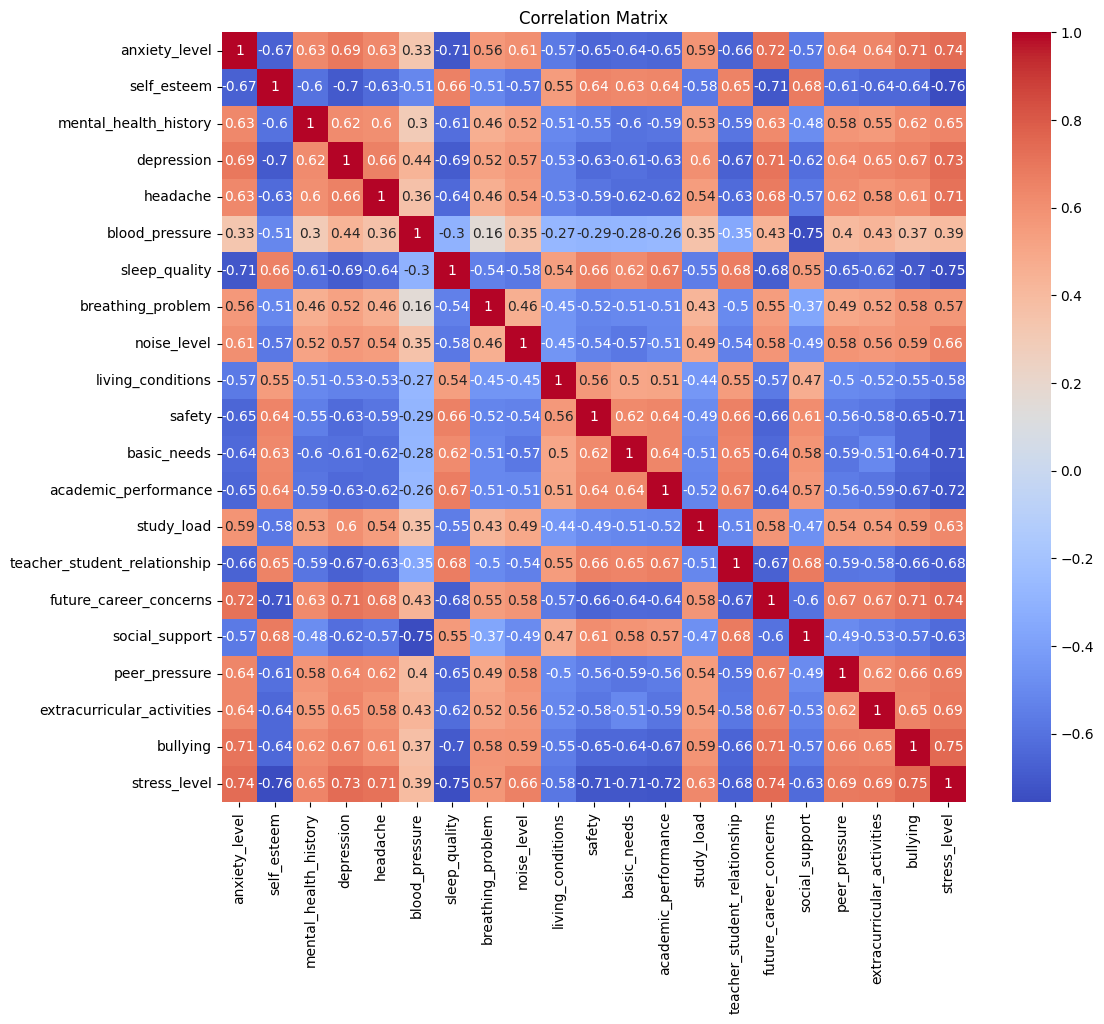

In [17]:
# Display information about the DataFrame
data.info()

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

The graph generated from the correlation matrix provides an overall perspective on the linear relationships between the variables in the dataset, except "stress_level". The shaded colors, ranging from dark blue to dark red, indicate the strengths and directions of the correlations. Overall, most variables show significant correlations, either negative (dark blue) or positive (dark red), suggesting consistency in linear trends between these factors.

A notable point concerns the variable "blood_pressure" which displays a correlation of 0.39 with other variables. This value, although positive, remains below 0.5, indicating a moderate correlation. This observation suggests that blood pressure is associated with other variables, but the strength of this relationship is not as strong as that observed between other pairs of variables. If blood pressure is linked to student stress, this moderate correlation suggests a potential contribution to stress levels, while highlighting that other factors may also play a significant role.


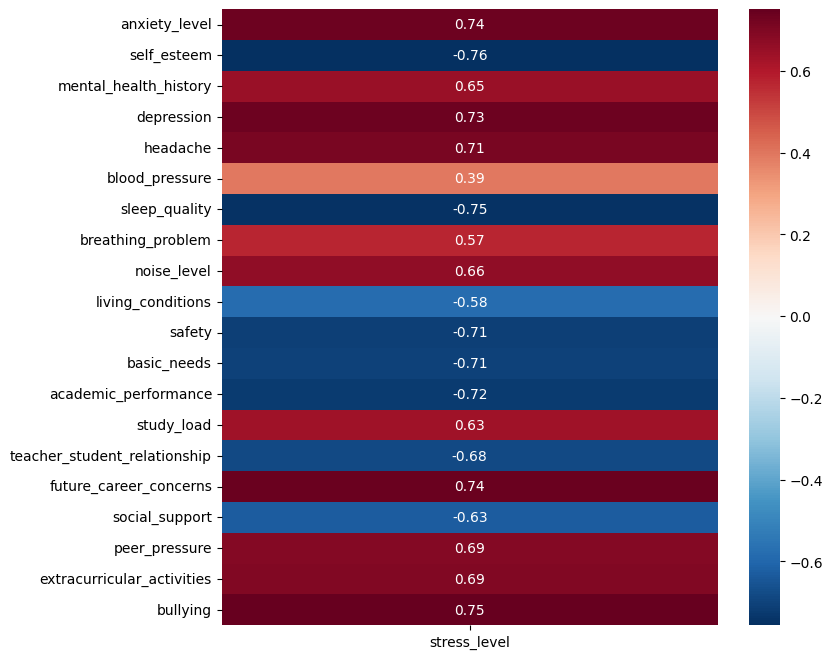

In [18]:
correl = data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correl.iloc[:-1,-1:], annot = True, cmap = "RdBu_r");

### PCA

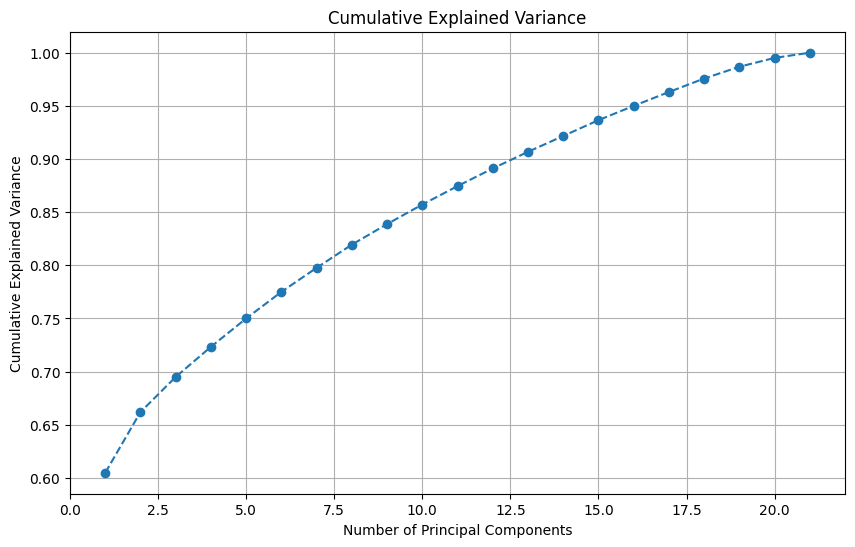

In [19]:
# Select relevant columns for PCA analysis

columns_for_pca = data.select_dtypes(include=['float64', 'int64']).columns
data_for_pca = data[columns_for_pca]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Apply Principal Component Analysis (PCA)
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


### Classification model:




Using a Classifier model, our program evaluates the relative importance of different characteristics in the psychological, physiological, environmental, academic, and social categories. All the results are compared by the “stress level”. The results of this analysis will offer valuable insights into potential levers of action to alleviate student stress.

In [20]:
# Define factors
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

# Define feature sets for each factor

psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Initialize a Random Forest Regressor
model = RandomForestRegressor()


feature_importance = {}

# Loop through each factor and analyze feature importance

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = data[features]
    y = data['stress_level']

    model.fit(X, y)

    # Get feature importances
    importance = model.feature_importances_


    # Store feature importances in the dictionary

    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}


    # Print the feature importance for each factor

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

Factor: Psychological
- Feature: anxiety_level, Importance: 0.22910473562853437
- Feature: self_esteem, Importance: 0.5639484201453185
- Feature: mental_health_history, Importance: 0.019834687002240538
- Feature: depression, Importance: 0.18711215722390664

Factor: Physiological
- Feature: headache, Importance: 0.39725364072454616
- Feature: blood_pressure, Importance: 0.050764552275783706
- Feature: sleep_quality, Importance: 0.4807358061067021
- Feature: breathing_problem, Importance: 0.07124600089296818

Factor: Environmental
- Feature: noise_level, Importance: 0.15582798704913586
- Feature: living_conditions, Importance: 0.12568630502550301
- Feature: safety, Importance: 0.29076958930637764
- Feature: basic_needs, Importance: 0.42771611861898345

Factor: Academic
- Feature: academic_performance, Importance: 0.39164268014147674
- Feature: study_load, Importance: 0.10424920017899085
- Feature: teacher_student_relationship, Importance: 0.26424103190858067
- Feature: future_career_conc

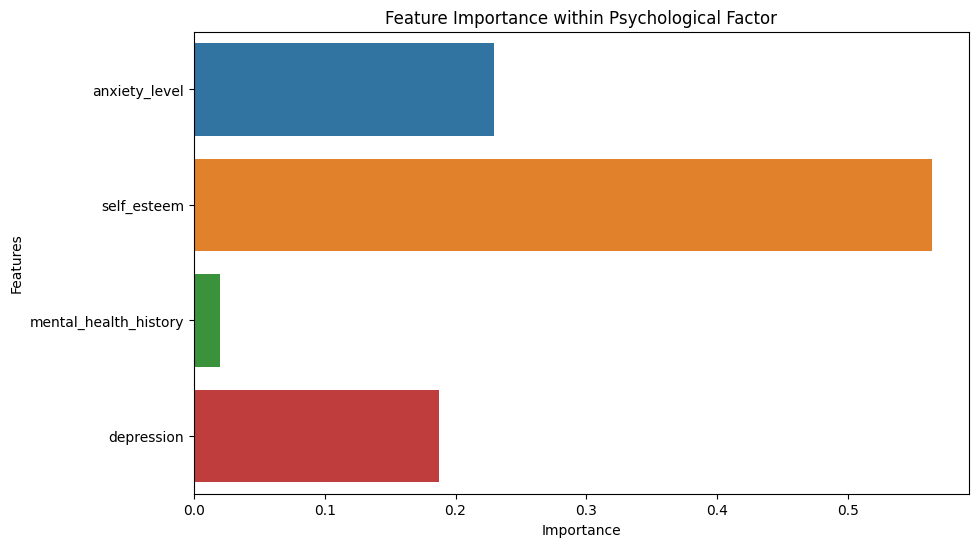

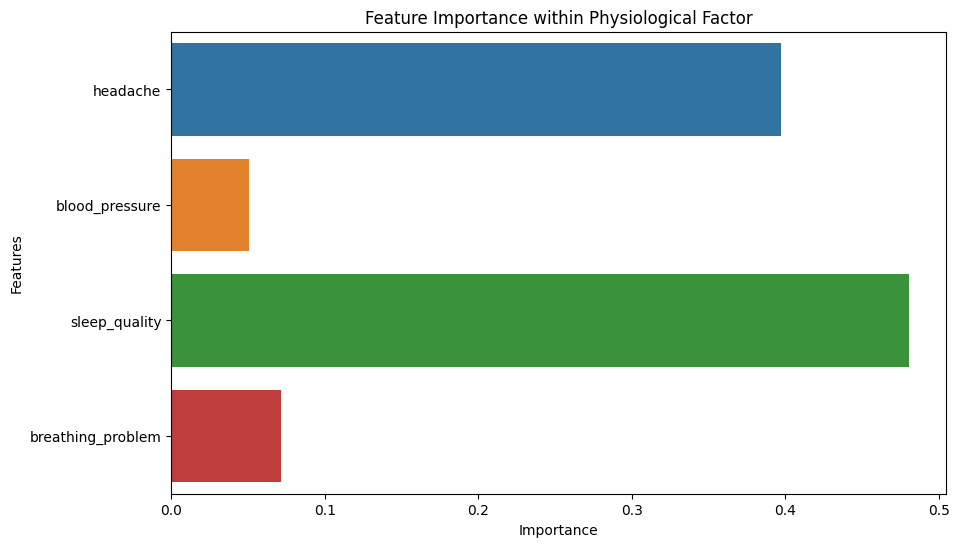

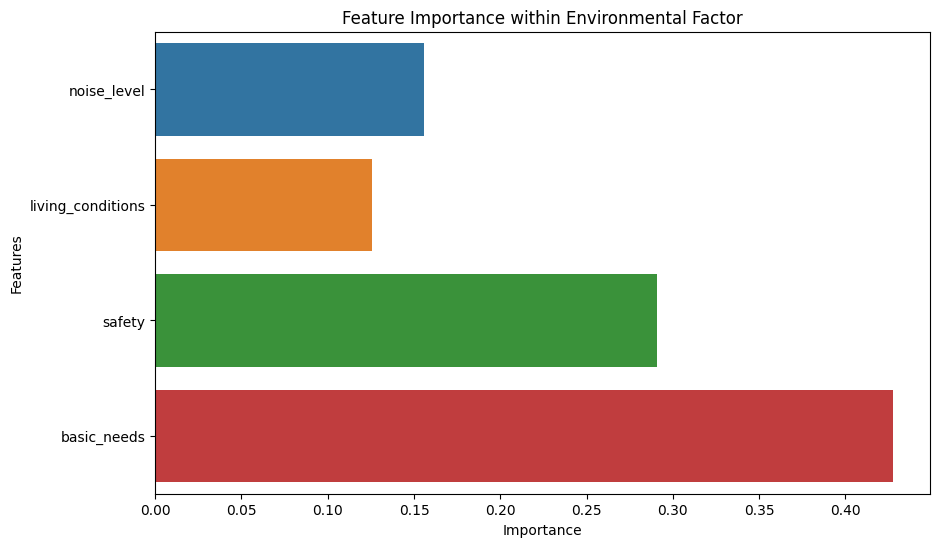

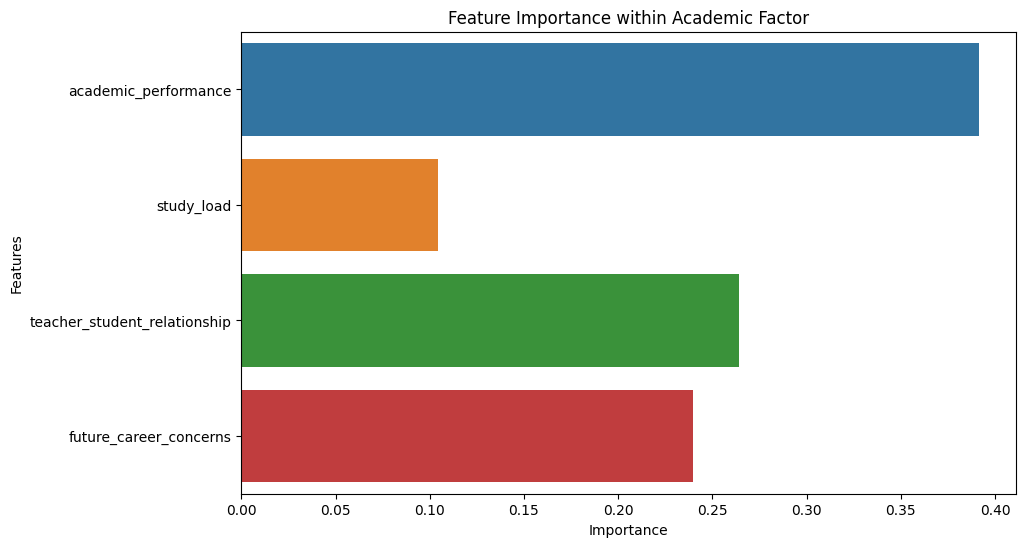

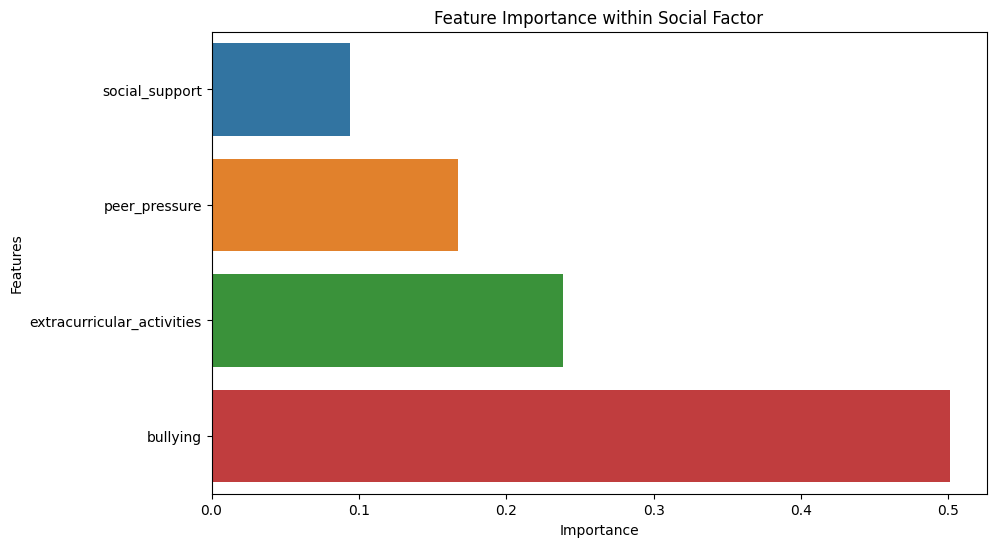

In [21]:
# Define feature importance for each factor

psychological_feature_importance = feature_importance['Psychological']
physiological_feature_importance = feature_importance['Physiological']
environmental_feature_importance = feature_importance['Environmental']
academic_feature_importance = feature_importance['Academic']
social_feature_importance = feature_importance['Social']



# Create bar charts for feature importance within each factor

def plot_feature_importance(factor_name, importance_dict):
    features = list(importance_dict.keys())
    importance = list(importance_dict.values())
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=features, orient='h')
    plt.title(f"Feature Importance within {factor_name} Factor")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance('Psychological', psychological_feature_importance)
plot_feature_importance('Physiological', physiological_feature_importance)
plot_feature_importance('Environmental', environmental_feature_importance)
plot_feature_importance('Academic', academic_feature_importance)
plot_feature_importance('Social', social_feature_importance)

In [22]:
# Remove features with importance below 0.1
selected_features = {}

for factor, importance_dict in feature_importance.items():
    selected_features[factor] = [feature for feature, importance_value in importance_dict.items() if importance_value >= 0.1]

# Create a list of all selected features
all_selected_features = set(feature for features_list in selected_features.values() for feature in features_list)

# Remove unwanted features from the original dataset
filtered_data = data[all_selected_features]



<ipython-input-22-232e2a0d9dc6>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  filtered_data = data[all_selected_features]


In [23]:
category_ = {
    'Psychological': ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression'],
    'Physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental': ['noise_level', 'living_conditions', 'safety', 'basic_needs'],
    'Academic': ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'],
    'Social': ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']
}


In [24]:
# Create dictionaries of selected features by category
selected_features_by_category = {category: [] for category in factors}

for factor, features_list in selected_features.items():
    for category, category_features in category_.items():
        selected_features_by_category[category].extend([feature for feature in features_list if feature in category_features])

# Display feature names by category
for category, category_features in selected_features_by_category.items():
    print(f"\n{category} Category:")
    print(", ".join(category_features))


Psychological Category:
anxiety_level, self_esteem, depression

Physiological Category:
headache, sleep_quality

Environmental Category:
noise_level, living_conditions, safety, basic_needs

Academic Category:
academic_performance, study_load, teacher_student_relationship, future_career_concerns

Social Category:
peer_pressure, extracurricular_activities, bullying


future_career_concerns


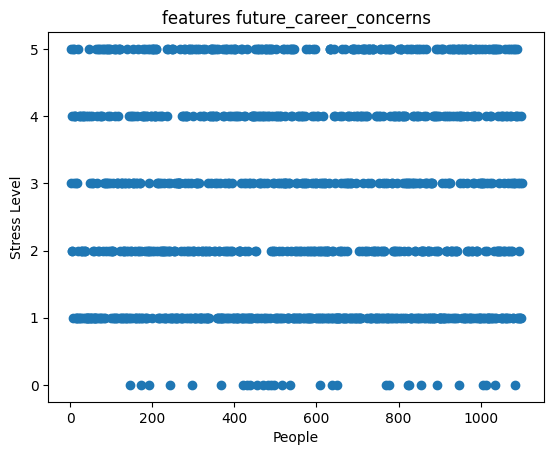

academic_performance


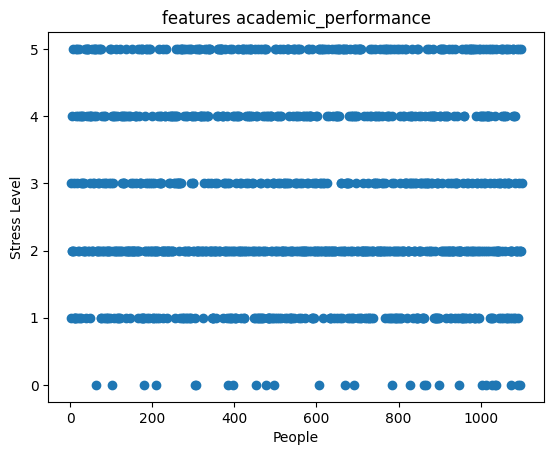

study_load


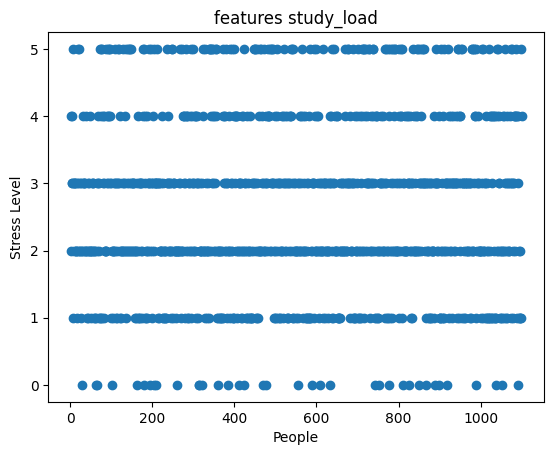

peer_pressure


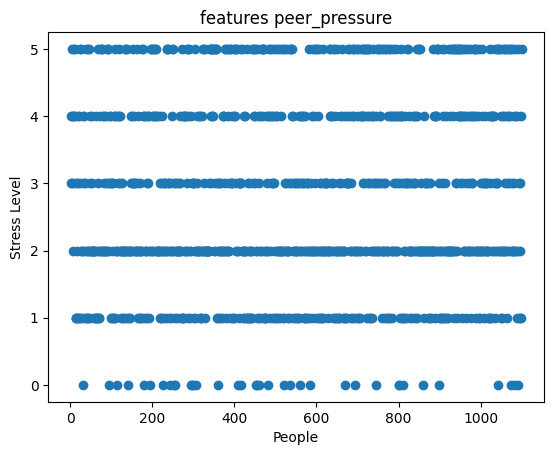

self_esteem


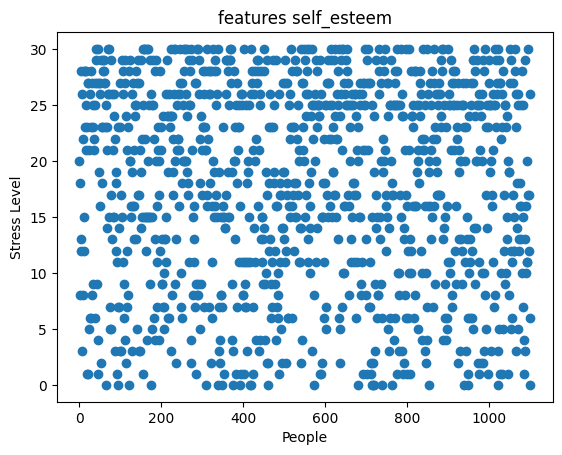

headache


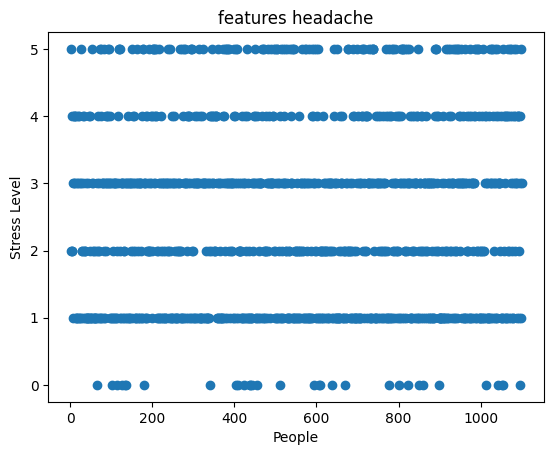

depression


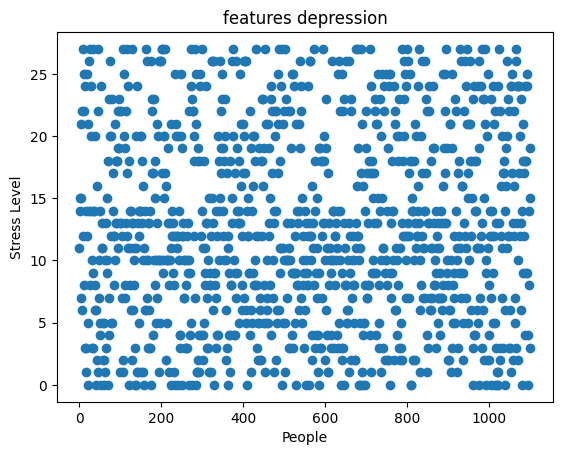

basic_needs


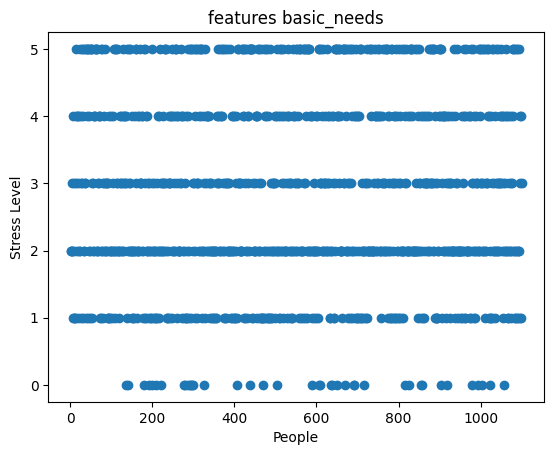

teacher_student_relationship


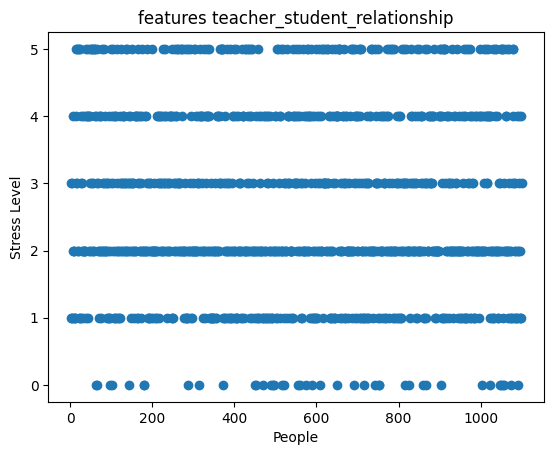

bullying


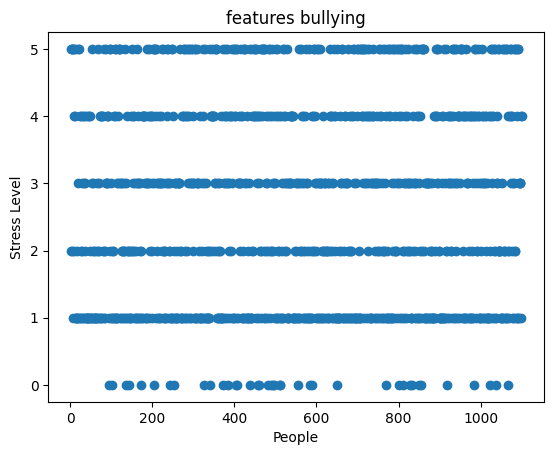

noise_level


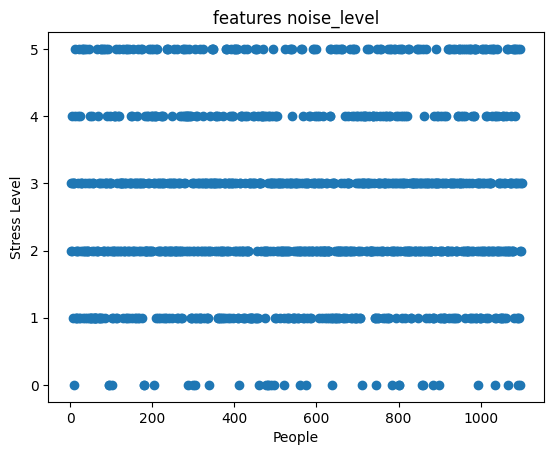

sleep_quality


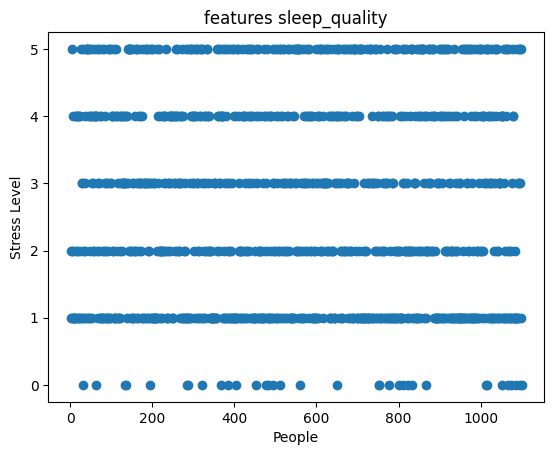

anxiety_level


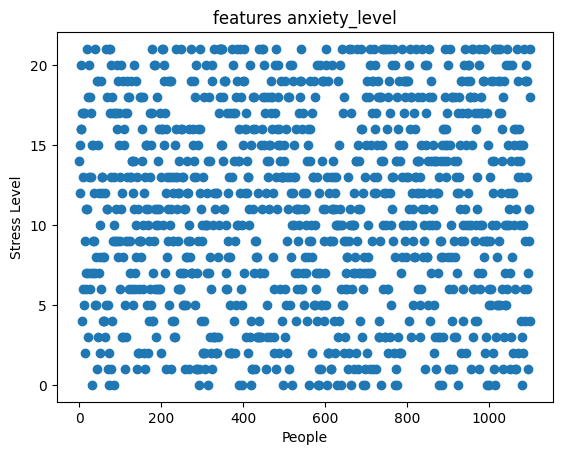

living_conditions


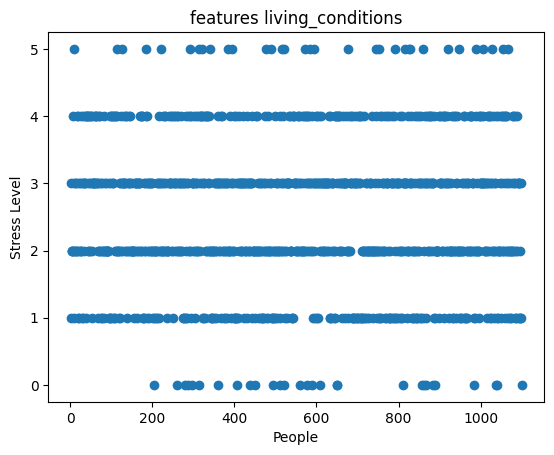

extracurricular_activities


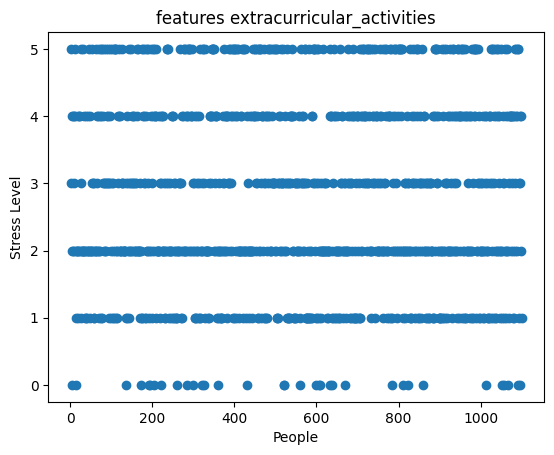

safety


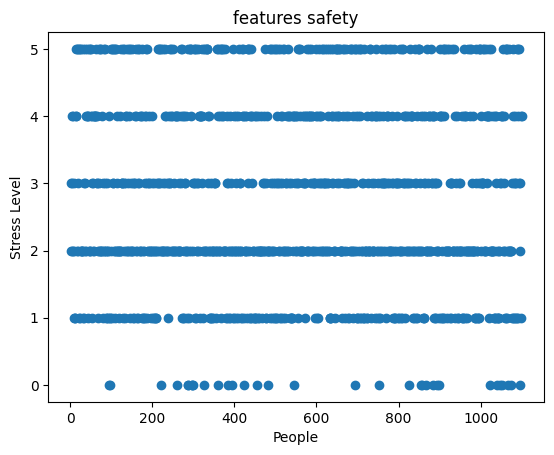

In [25]:
for i, df in enumerate(filtered_data):
    print(df)
    X = range(1, len(data['stress_level']) + 1)
    y = data[df]
    plt.scatter(X, y, label=f'Dataset {df}')

    # Add labels and a title
    plt.xlabel('People')
    plt.ylabel('Stress Level')
    plt.title(f'features {df}')

    # Display the plot
    plt.show()



#K Nearest Neighbor (KNN)


future_career_concerns


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


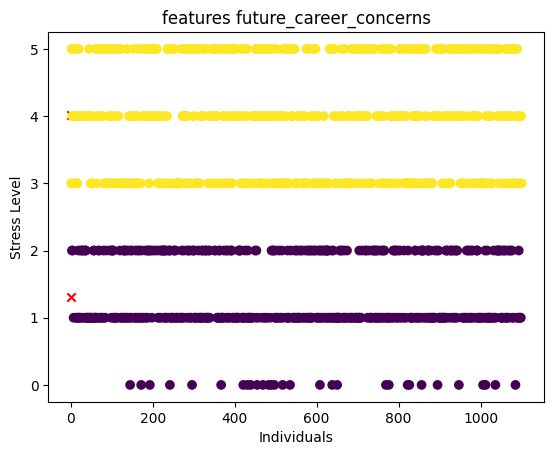

academic_performance


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


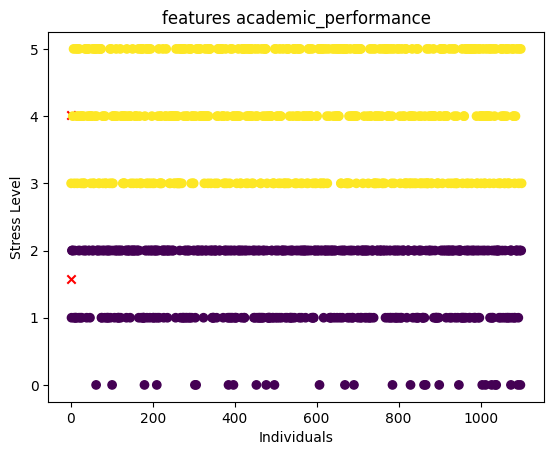

study_load


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


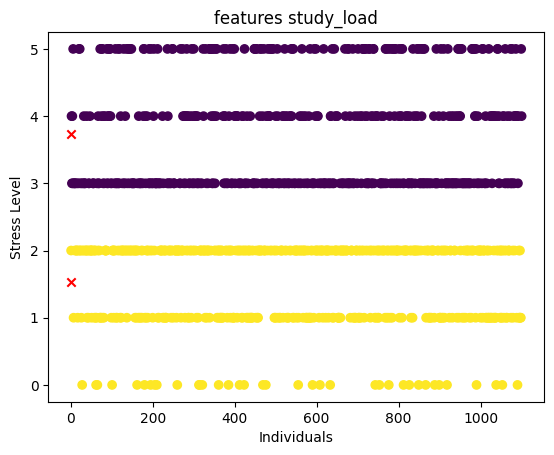

peer_pressure


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


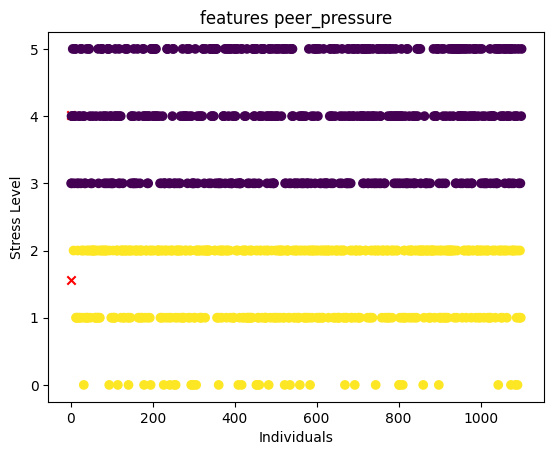

self_esteem


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


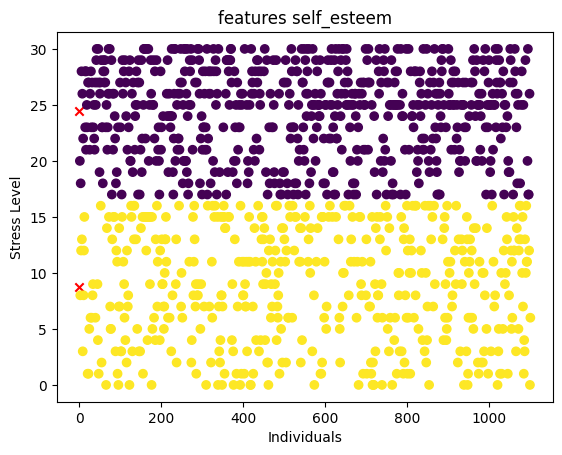

headache


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


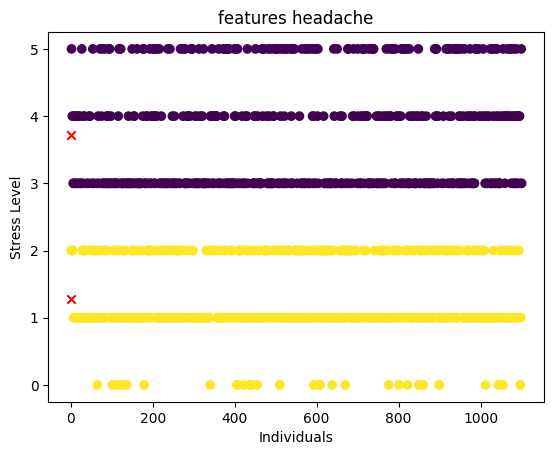

depression


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


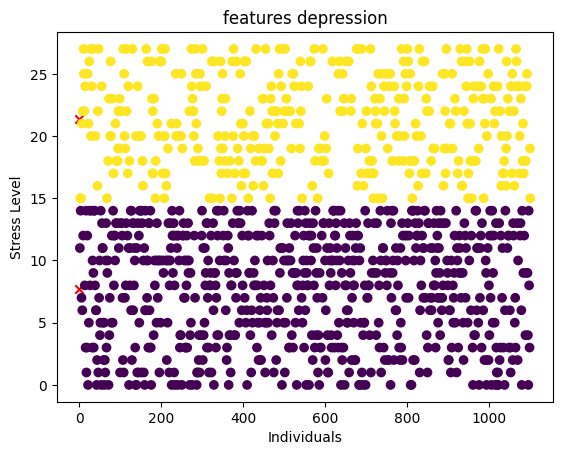

basic_needs


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


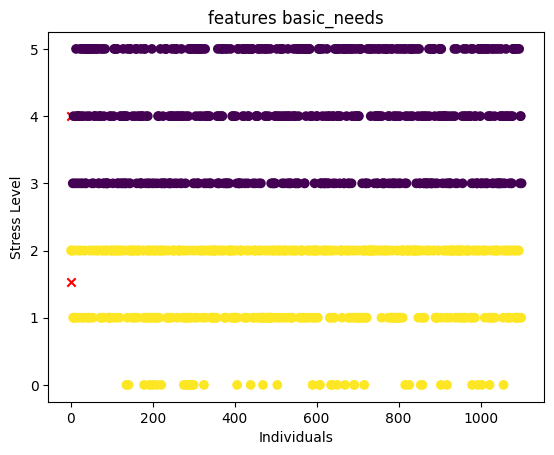

teacher_student_relationship


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


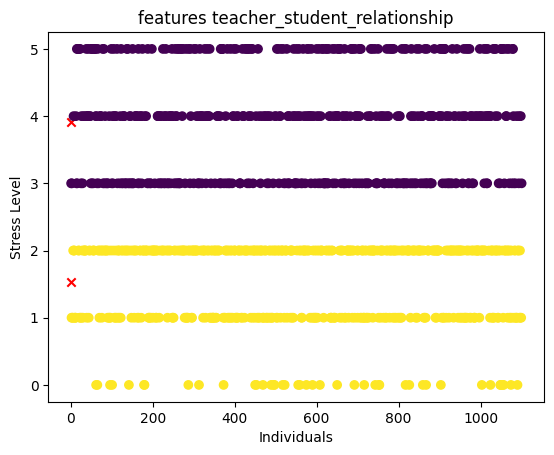

bullying


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


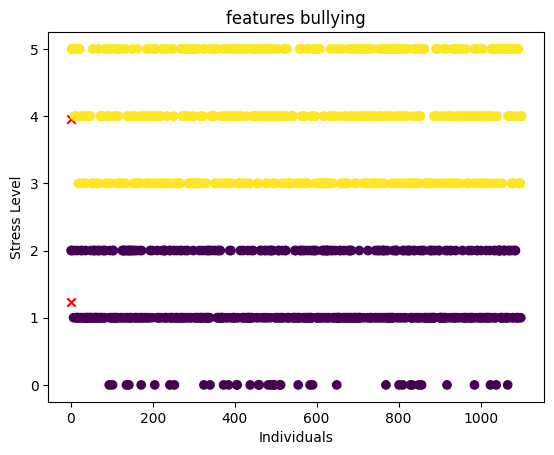

noise_level


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


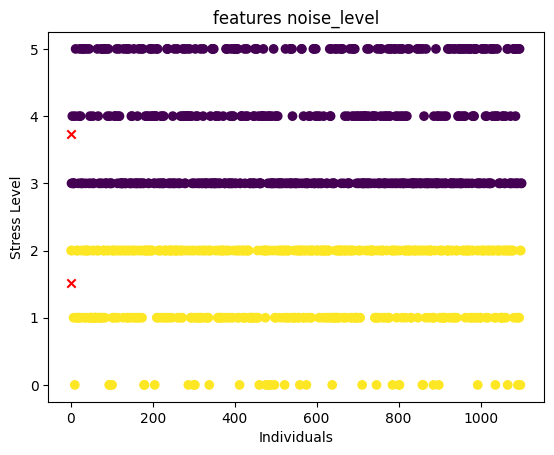

sleep_quality


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


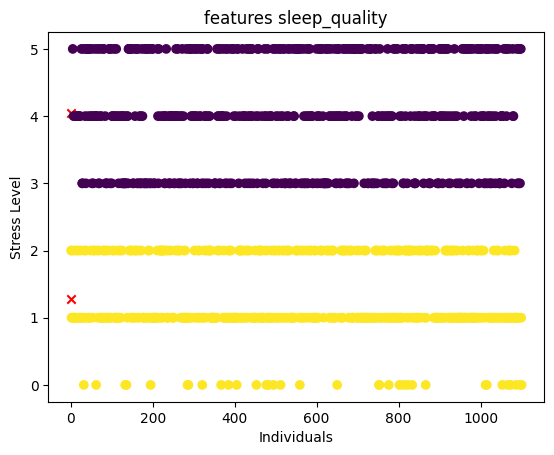

anxiety_level


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


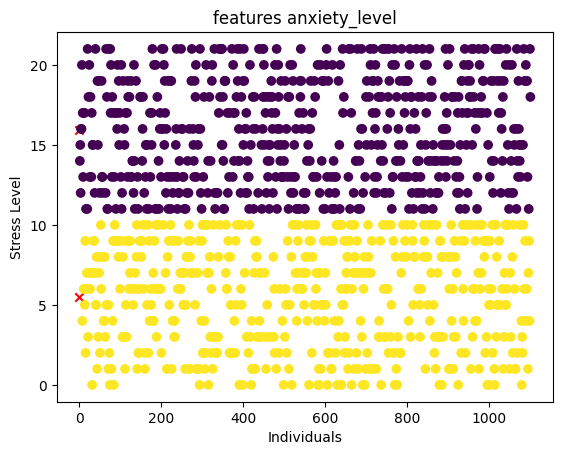

living_conditions


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


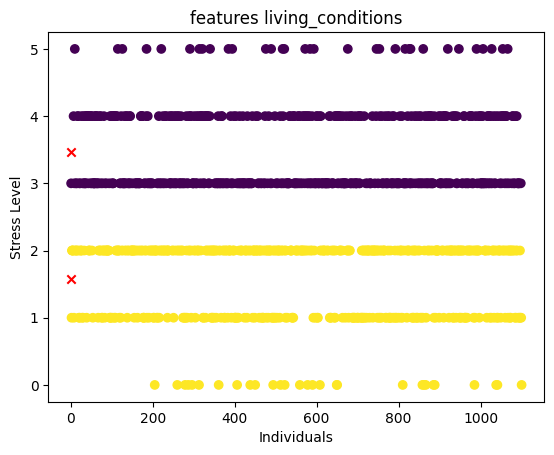

extracurricular_activities


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


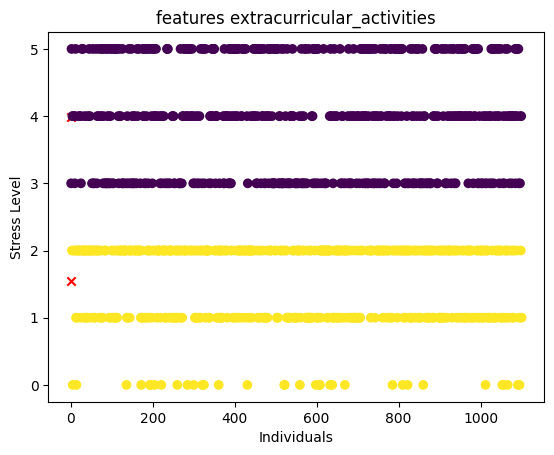

safety


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


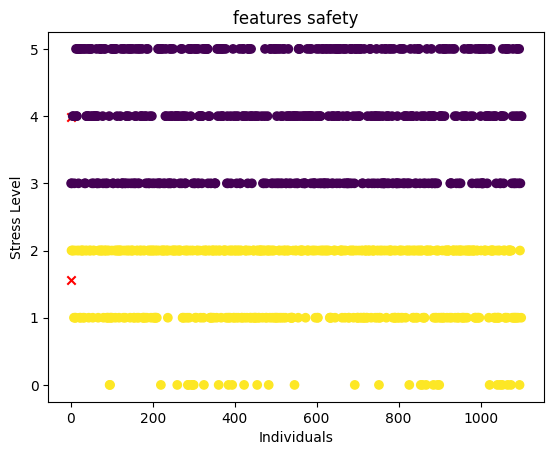

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluster_coordinates = []
max_values = []  # Array to store the maximum values of y in each iteration

# Number of clusters you want to create
n_clusters = 2

# Create a scatter plot with different colors for each dataset and apply K-Means
for i, df in enumerate(filtered_data):
    print(df)
    X = range(1, len(data['stress_level']) + 1)
    #X = data['stress_level']
    y = filtered_data[df]

    # Create a DataFrame with a single column 'Stress Level' to facilitate clustering
    df_cluster = pd.DataFrame({f'{df}': y})
    # Store the maximum value of y in max_values array
    max_values.append(max(y))


    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters)

    df_cluster['Cluster'] = kmeans.fit_predict(df_cluster[[f'{df}']])

    for i in range (n_clusters):
      # Get cluster centers
      cluster_centers = kmeans.cluster_centers_
      cluster_coordinates.append(cluster_centers[i])

      # Plot cluster centers
      plt.scatter(0,cluster_centers[i] , c='red', marker='x', label='Cluster Centers')


    # Plot the points using clusters as colors
    plt.scatter(X, y, c=df_cluster['Cluster'], cmap='viridis', label=f'Dataset {i+1}')

    # Add labels and a title
    plt.xlabel('Individuals')
    plt.ylabel('Stress Level')
    plt.title(f'features {df}')

    # Show the plot
    plt.show()


In [27]:
print( cluster_coordinates)

[array([1.30395683]), array([4.02389706]), array([1.57040998]), array([4.02411874]), array([3.73027523]), array([1.53333333]), array([4.0170778]), array([1.55497382]), array([24.45339652]), array([8.72805139]), array([3.71582734]), array([1.27389706]), array([7.69957687]), array([21.36061381]), array([3.99818841]), array([1.53832117]), array([3.91650485]), array([1.53162393]), array([1.23659889]), array([3.95348837]), array([3.73001776]), array([1.51582868]), array([4.04]), array([1.28]), array([15.92687075]), array([5.47851563]), array([3.46448087]), array([1.5753176]), array([3.99272727]), array([1.54181818]), array([3.98317757]), array([1.55752212])]


In [28]:
values=[]
for i, df in enumerate(filtered_data):
    try:
        user_input= float(input(f'Give a score between 1 and 10 for your level of {df} '))
        if 1 <= user_input <= 10:
            values.append(user_input)  # Store the valid input in the dictionary

        else:
            print("Value must be between 1 and 10. Please try again.")
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

Give a score between 1 and 10 for your level of future_career_concerns 9
Give a score between 1 and 10 for your level of academic_performance 5
Give a score between 1 and 10 for your level of study_load 7
Give a score between 1 and 10 for your level of peer_pressure 1
Give a score between 1 and 10 for your level of self_esteem 2
Give a score between 1 and 10 for your level of headache 3
Give a score between 1 and 10 for your level of depression 9
Give a score between 1 and 10 for your level of basic_needs 5
Give a score between 1 and 10 for your level of teacher_student_relationship 4
Give a score between 1 and 10 for your level of bullying 6
Give a score between 1 and 10 for your level of noise_level 1
Give a score between 1 and 10 for your level of sleep_quality 7
Give a score between 1 and 10 for your level of anxiety_level 9
Give a score between 1 and 10 for your level of living_conditions 5
Give a score between 1 and 10 for your level of extracurricular_activities 4
Give a score b

In [29]:
for i, df in enumerate(filtered_data):
  values[i]=(values[i]/10)* max_values[i]

This code adjusts the score according to the values of the various features in the database

In [30]:
distance = 2

for i, df in enumerate(filtered_data):
    if distance >= abs(values[i] - max_values[i]):
        print(values[i])
        print(max_values[i])
        print(f'You need to pay attention to {df}')



4.5
5
You need to pay attention to future_career_concerns
3.5
5
You need to pay attention to study_load
3.0
5
You need to pay attention to bullying
3.5
5
You need to pay attention to sleep_quality
3.5
5
You need to pay attention to safety
